Inizio: 16:00

## Parte 0

In [126]:
import pandas as pd 

data = pd.read_csv('./dataset.csv', sep=',')
data.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


## Parte 1

1.

In [127]:
n_instances = data.index.size
completness = not data.isna().any().any()
values = data['Type'].value_counts()

print(f'Numero di righe nel dataset: {n_instances}')
print(f'Il dataset è completo? {completness}')
print(f'Il dataset è bilanciato? {values}') 

# Considerazioni
# Il dataset non è completo e non è bilanciato

Numero di righe nel dataset: 6485
Il dataset è completo? False
Il dataset è bilanciato? Type
GIA              3355
IGI Lab-Grown    1876
GIA Lab-Grown    1254
Name: count, dtype: int64


2.

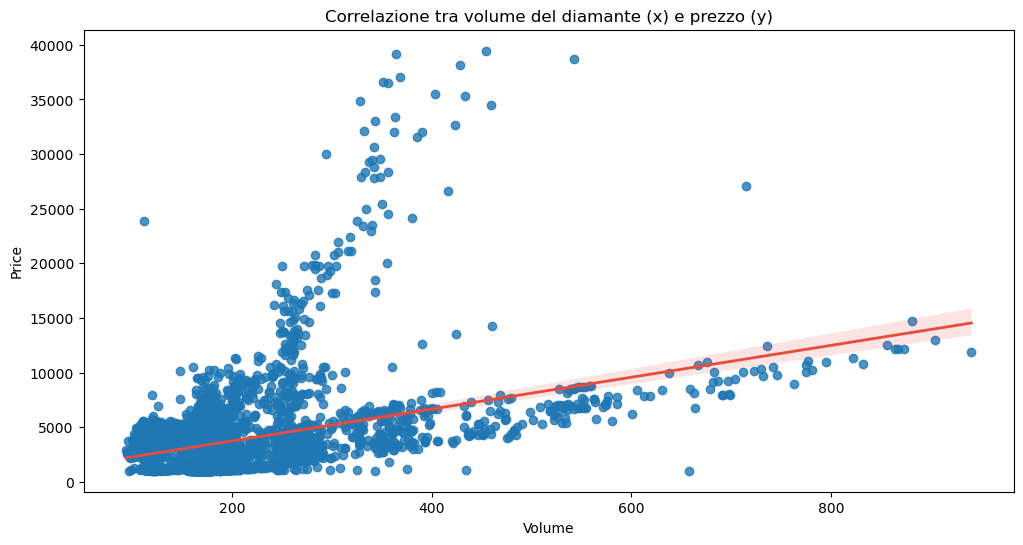

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt 

data2 = data.copy()
data2['Volume'] = data2['Length'] * data2['Width'] * data2['Height']

data_plot = data2[data2['Volume'] < 1000]
plt.figure(figsize=(12,6))
plt.title('Correlazione tra volume del diamante (x) e prezzo (y)')
sns.regplot(data_plot, x='Volume', y='Price',
            line_kws={'color': '#e74c3c', 'linewidth': 2})
plt.show()

# Considerazioni
# Il grafico mostra che c'è una correlazione positiva tra volume del diamante e prezzo,
# tuttavia si evince anche che non è solo il volume ad essere correlato al prezzo,
# ma deve esserci almeno un'altra feature. Infatti è possibile notare come ci siano
# molti diamanti con un volume < 400 con un prezzo molto più elevato rispetto ad altri
# diamanti più grandi.

3.

In [129]:
data3 = data.copy()

# Considero solo i record con valori non nulli di Cut
data3 = data3.dropna(subset=['Cut'])
data3['Cut'].isna().value_counts()

data3['Carat_bins'] = pd.qcut(data3['Carat Weight'], q=5)

pivot = pd.pivot_table(data=data3, 
                       index='Cut', 
                       columns='Carat_bins', 
                       values='Price', 
                       aggfunc=['mean', 'count'])

print('Prezzo medio per Taglio / Peso')
display(pivot)

# Considerazioni
# Dalla tabella pivot emerge che il prezzo cresce all'aumentare della qualità del taglio
# Per quanto riguarda la relazione del prezzo medio: non si evince una chiara correlazione
# Tra i carati e il prezzo medio.

Prezzo medio per Taglio / Peso


mean                                                      \
Carat_bins (0.999, 1.01] (1.01, 1.02] (1.02, 1.16] (1.16, 1.58] (1.58, 4.03]   
Cut                                                                            
Astor        4650.000000  4230.000000  4983.333333  7155.000000          NaN   
Excellent    3920.016529  3997.368421  3620.000000  1844.230769  1899.090909   
Ideal        2980.974026  2422.222222  1718.490028  2286.597510  4317.689970   
Very Good    3400.619469  3263.076923  3306.428571  2954.000000          NaN   

                   count                                                      
Carat_bins (0.999, 1.01] (1.01, 1.02] (1.02, 1.16] (1.16, 1.58] (1.58, 4.03]  
Cut                                                                           
Astor                2.0          1.0          3.0          2.0          NaN  
Excellent          242.0         19.0         52.0        260.0         33.0  
Ideal              308.0         81.0        351.0        241.0        329.0  
Very Good          226.0         13.0         14.0          5.0          NaN

4.

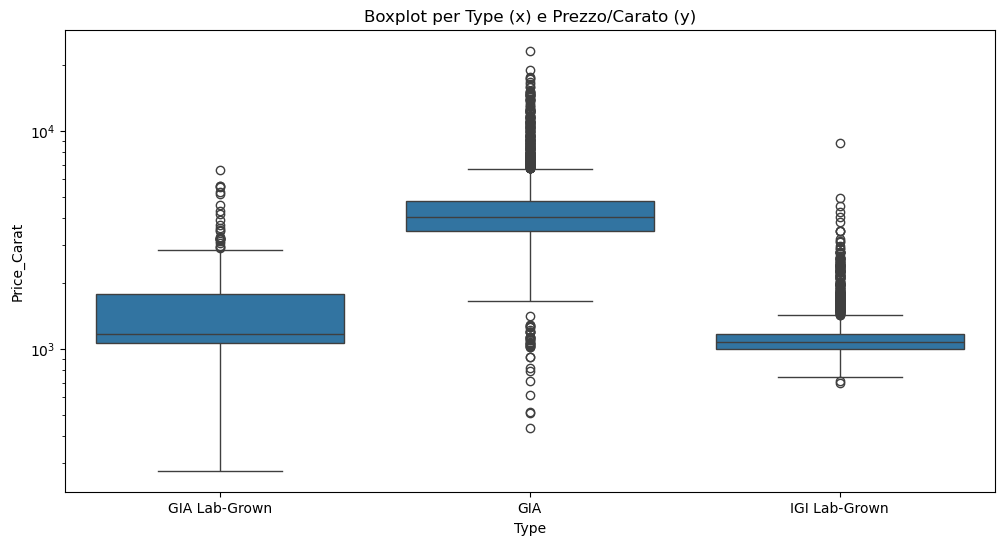

In [130]:
data4 = data.copy()

data4['Price_Carat'] = data4['Price'] / data4['Carat Weight']

plt.figure(figsize=(12,6))
plt.title('Boxplot per Type (x) e Prezzo/Carato (y)')
sns.boxplot(data4, 
            x='Type',
            y='Price_Carat')
plt.yscale('log')
plt.show()

## Parte 2

1.

In [131]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   str    
 1   Cut                 2182 non-null   str    
 2   Color               6480 non-null   str    
 3   Clarity             6480 non-null   str    
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   str    
 9   Symmetry            6465 non-null   str    
 10  Girdle              6463 non-null   str    
 11  Culet               1891 non-null   str    
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type             

In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Non elimino alcun attributo, non penso ci siano attributi inutili

# Elimino attributi con più della metà di valori nulli 
data = data.dropna(axis=1, thresh=data.index.size/2)

# Elimino istanze con valori nulli
data = data.dropna(how='any')

# Trasformo i valori categorici
data_transformed = pd.get_dummies(data, columns=['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle'])

X = data_transformed.drop(columns=['Type'])
y = LabelEncoder().fit_transform(data_transformed['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42, stratify=y)

#############################
DecisionTreeClassifier scores
#############################

(Train) f1 score: 1.0


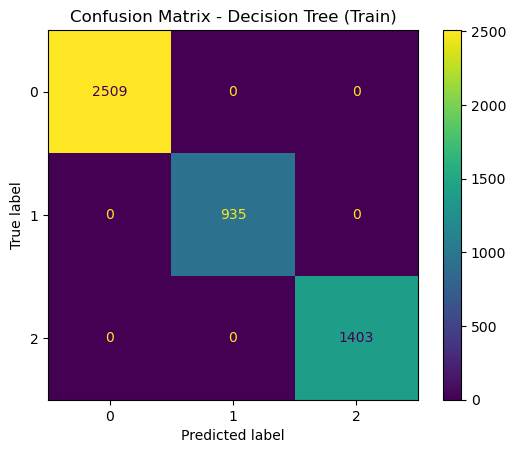

(Test) f1 score: 0.9319406374774577


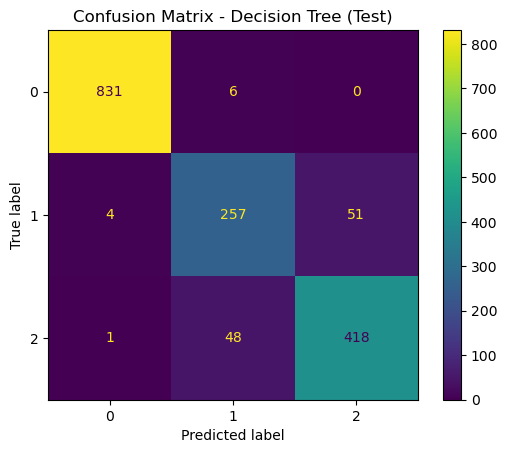

In [153]:
# Decision Tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred_tree_train = tree_model.predict(X_train)
y_pred_tree_test = tree_model.predict(X_test)

f1_tree_train = f1_score(y_train, y_pred_tree_train, average='weighted')
f1_tree_test = f1_score(y_test, y_pred_tree_test, average='weighted')

conf_matrix_tree_train = confusion_matrix(y_train, y_pred_tree_train)
conf_matrix_tree_test = confusion_matrix(y_test, y_pred_tree_test)

print("#############################")
print("DecisionTreeClassifier scores")
print("#############################")
print()

print(f"(Train) f1 score: {f1_tree_train}")

ConfusionMatrixDisplay.from_estimator(tree_model, X_train, y_train)
plt.title('Confusion Matrix - Decision Tree (Train)')
plt.show()

print(f"(Test) f1 score: {f1_tree_test}")
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title('Confusion Matrix - Decision Tree (Test)')
plt.show()

**Considerazioni su DecisionTree scores** <br>
l'f1 score di Train è perfetto 1.0: sembra che l'albero abbia overfittato imparando a memoria <br>
il dataset di train. La confusion Matrix ce lo conferma. <br>
Per quanto riguarda quello di test invece, l'f1 score è ottimo.

In [136]:
# KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_test = knn_model.predict(X_test)

f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')
f1_knn_test = f1_score(y_test, y_pred_knn_test, average='weighted')

conf_matrix_knn_train = confusion_matrix(y_train, y_pred_knn_train)
conf_matrix_knn_test = confusion_matrix(y_test, y_pred_knn_test)

print("#############################")
print("KNeighborsClassifier scores")
print("#############################")
print()

print(f"(Train) f1 score: {f1_knn_train}")
print("(Train) Confusion Matrix:")
print(conf_matrix_knn_train)
print()

print(f"(Test) f1 score: {f1_knn_test}")
print("(Test) Confusion Matrix:")
print(conf_matrix_knn_test)

#############################
KNeighborsClassifier scores
#############################

(Train) f1 score: 0.8393796231808925
(Train) Confusion Matrix:
[[2445   35   29]
 [ 231  471  233]
 [ 126   74 1203]]

(Test) f1 score: 0.7742759742126267
(Test) Confusion Matrix:
[[804  20  13]
 [ 92 103 117]
 [ 47  44 376]]


**Considerazioni su KNeighborsClassifier** <br>
Sembra che qui non ci sia lo stesso fenomeno di overfitting come per l'albero: <br>
l'f1 score di test è ottimo ed è sotto quello di train di circa 0.05. <br>
Sembra tuttavia che il DecisionTree sia più preciso nel riconoscere il tipo

In [137]:
# DummyClassifier

from sklearn.dummy import DummyClassifier


dum_model = DummyClassifier()
dum_model.fit(X_train, y_train)

y_pred_dum_train = dum_model.predict(X_train)
y_pred_dum_test = dum_model.predict(X_test)

f1_dum_train = f1_score(y_train, y_pred_dum_train, average='weighted')
f1_dum_test = f1_score(y_test, y_pred_dum_test, average='weighted')

conf_matrix_dum_train = confusion_matrix(y_train, y_pred_dum_train)
conf_matrix_dum_test = confusion_matrix(y_test, y_pred_dum_test)

print("#############################")
print("Dummy Classifier scores")
print("#############################")
print()

print(f"(Train) f1 score: {f1_dum_train}")
print("(Train) Confusion Matrix:")
print(conf_matrix_dum_train)
print()

print(f"(Test) f1 score: {f1_dum_test}")
print("(Test) Confusion Matrix:")
print(conf_matrix_dum_test)

#############################
Dummy Classifier scores
#############################

(Train) f1 score: 0.3531153346789126
(Train) Confusion Matrix:
[[2509    0    0]
 [ 935    0    0]
 [1403    0    0]]

(Test) f1 score: 0.3534614111635379
(Test) Confusion Matrix:
[[837   0   0]
 [312   0   0]
 [467   0   0]]


**Considerazioni su Dummy Classifier** <br>
Il Dummy Classifier ci serve come baseline per valutare meglio gli altri classificatori: <br>
Ora sappiamo che l'f1 score di 0.35 è la baseline. <br>

2.

In [138]:
from sklearn.model_selection import cross_validate

cv_tree = cross_validate(tree_model, X_train, y_train, cv=10, scoring='f1_weighted')
f1_tree_test_cv = cv_tree['test_score'].mean()

cv_knn = cross_validate(knn_model, X_train, y_train, cv=10, scoring='f1_weighted')
f1_knn_test_cv = cv_knn['test_score'].mean()

cv_dum = cross_validate(dum_model, X_train, y_train, cv=10, scoring='f1_weighted')
f1_dum_test_cv = cv_dum['test_score'].mean()

f1_tree_delta = f1_tree_test_cv - f1_tree_test
f1_knn_delta = f1_knn_test_cv - f1_knn_test
f1_dum_delta = f1_dum_test_cv - f1_dum_test 

print(f"Delta dell'f1 score per DecisionTreeClassifier: {f1_tree_delta:.2f}")
print(f"Delta dell'f1 score per KNeighborsClassifier: {f1_knn_delta:.2f}")
print(f"Delta dell'f1 score per DummyClassifier: {f1_dum_delta:.2f}")

# Considerazioni
# Il Delta rispetto all'f1 score calcolato precedentemente è vicino a 0.
# Questo ci indica che la stima iniziale era affidabile e che le performance dei 
# modelli sono stabili al variare del train set.

Delta dell'f1 score per DecisionTreeClassifier: -0.02
Delta dell'f1 score per KNeighborsClassifier: 0.00
Delta dell'f1 score per DummyClassifier: -0.00


3.

In [139]:
from sklearn.inspection import permutation_importance

r = permutation_importance(knn_model, 
                           X_test, y_test,
                           n_repeats=5,
                           random_state=42,
                           scoring='f1_weighted')

In [140]:
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance_Mean': r.importances_mean,
    'Importance_Std': r.importances_std
})

importance_df_sorted = importance_df.sort_values(by='Importance_Mean', ascending=False)

top_2_features = importance_df_sorted['Feature'].head(2).tolist()
print(f"Le 2 feature più importanti per il KNeighborsClassifier sono: '{top_2_features[0]}' e '{top_2_features[1]}'")
print("\nDettaglio Importanza:\n", importance_df_sorted.head())

Le 2 feature più importanti per il KNeighborsClassifier sono: 'Price' e 'Table %'

Dettaglio Importanza:
                             Feature  Importance_Mean  Importance_Std
7                             Price         0.373341        0.013754
3                           Table %         0.008468        0.004543
2                           Depth %         0.007539        0.003188
42  Girdle_Medium to Slightly Thick         0.005103        0.000645
40                    Girdle_Medium         0.004643        0.000832


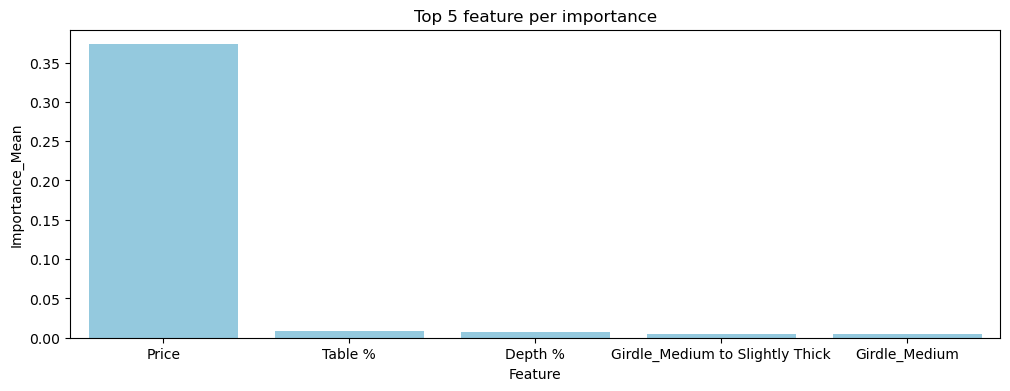

In [141]:
plt.figure(figsize=(12, 4))
plt.title('Top 5 feature per importance')
sns.barplot(importance_df_sorted.head(5), x='Feature', y='Importance_Mean', color='skyblue')
plt.show()

4.

In [142]:
from sklearn.model_selection import GridSearchCV

params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1, 3, 5, 10]
}

cv = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='f1_weighted').fit(X_train, y_train)

f1_delta_grid_search = cv.best_score_ - f1_knn_test

print(f'Parametri migliori trovato per KNN: {cv.best_params_}')
print(f'Delta di f1 score per il KNeighborsClassifier: {f1_delta_grid_search}')

Parametri migliori trovato per KNN: {'n_neighbors': 3, 'weights': 'distance'}
Delta di f1 score per il KNeighborsClassifier: 0.015628877948941855


5.

In [143]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler

preprocessing = ColumnTransformer(transformers=[
    ('discretizer', KBinsDiscretizer(), ['Length', 'Width', 'Height']),
    ('minmax_scaler', MinMaxScaler(), ['Price']),
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

pipeline.fit(X_train, y_train)

/home/alesvale/miniconda3/envs/bdta_env/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('discretizer', ...), ('minmax_scaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the

In [144]:
y_pred_pipeline_1 = pipeline.predict(X_test)

f1_pipeline = f1_score(y_test, y_pred_pipeline_1, average='weighted')

print(f'Delta f1-score con pipeline: {f1_pipeline - f1_knn_test}')

Delta f1-score con pipeline: 0.09110182931403454


6.

In [145]:
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessing = ColumnTransformer(transformers=[
    ('text', OneHotEncoder(), make_column_selector(dtype_include=str)),
], remainder='passthrough')

pipeline_6 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

pipeline_6.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('imputer', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('text', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [146]:
y_pred_pipeline_2 = pipeline_6.predict(X_test)

f1_pipeline_2 = f1_score(y_test, y_pred_pipeline_2, average='weighted')

print(f'KNN f1 score con pipeline: {f1_pipeline_2}')
print(f'Delta f1-score con pipeline: {f1_pipeline_2 - f1_knn_test}')

KNN f1 score con pipeline: 0.9050879237661047
Delta f1-score con pipeline: 0.13081194955347797


In [147]:
from sklearn.decomposition import TruncatedSVD

pipeline_7 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('decomp', TruncatedSVD()),
    ('model', KNeighborsClassifier())
])

params_7 = {
    'decomp__n_components': [2,4,6],
    'model__n_neighbors': [1, 3, 5],
    'model__weights': ['uniform', 'distance']
}

cv_7 = GridSearchCV(pipeline_7, param_grid=params_7, scoring='f1_weighted').fit(X_train, y_train)

In [148]:
print(f'KNN f1 score con SVD Decomposition: {cv_7.best_score_}')
print(f'Delta f1-score rispetto a pipeline precedente: {cv_7.best_score_ - f1_pipeline_2}')

KNN f1 score con SVD Decomposition: 0.908525973957589
Delta f1-score rispetto a pipeline precedente: 0.003438050191484354
